# Enhancing Iris DNN Performance: Implementing Dropout and Regularization Techniques to Combat Overfitting

Load the libraries and prepare the data

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)


Create, compile, fit the model and plot the accuracy and loss


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 5s 57ms/step - loss: 1.0929 - accuracy: 0.5446 - val_loss: 1.0813 - val_accuracy: 0.7368
Epoch 2/125
12/12 [==============================] - 0s 31ms/step - loss: 1.0812 - accuracy: 0.6339 - val_loss: 1.0708 - val_accuracy: 0.763

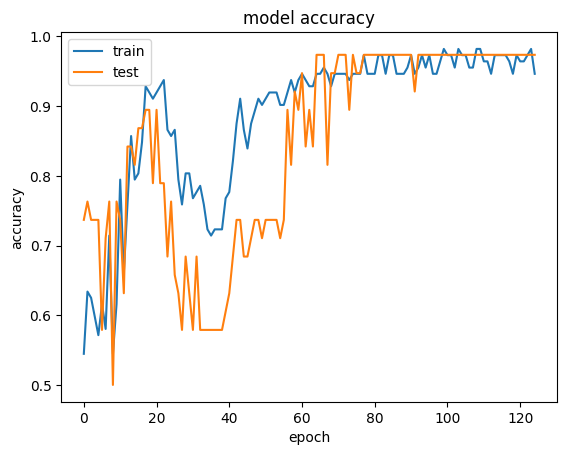

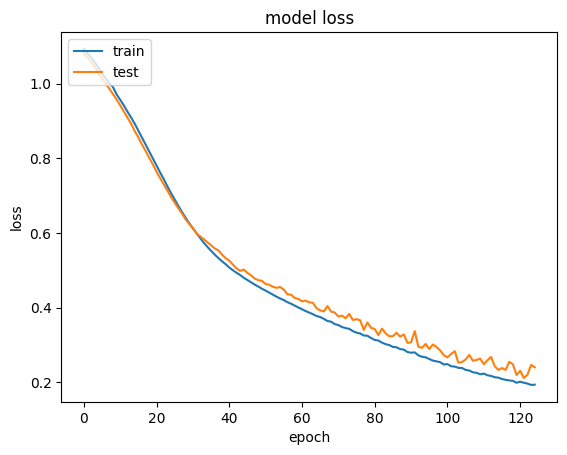

In [2]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Add a dropout layer to reduce the overfitting


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/1

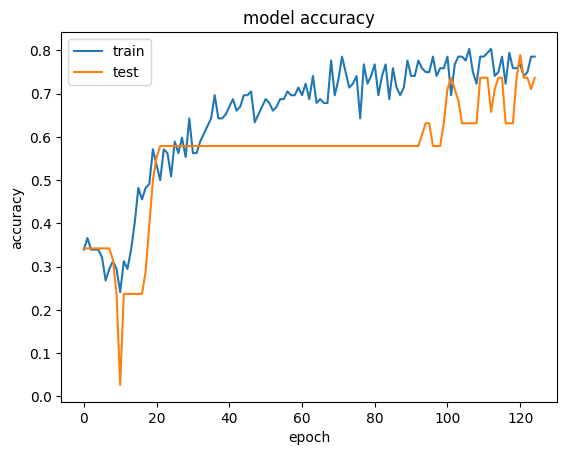

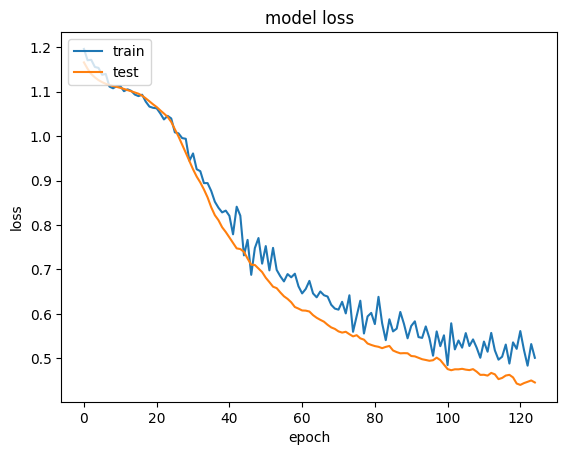

In [3]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

# create the model with a dropout layer
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
# add the dropout layer here
model.add(Dropout(0.2))
model.add(Dense(units=10,  activation='relu'))
# add the dropout layer here
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Construct a neural network with three hidden layers:
#### - The first hidden layer has 20 units.
#### - The second and third hidden layers each have 100 units.
#### -Add a Dropout layer after the second hidden layer to help mitigate overfitting.



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 100)               5100      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                                 
Total params: 15753 (61.54 KB)
Trainable params: 15753 (61.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/12 

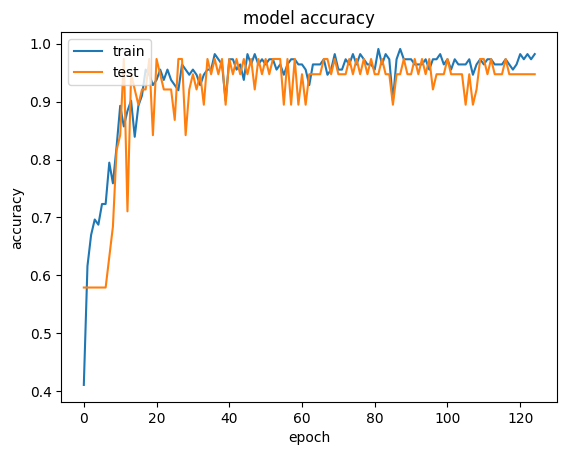

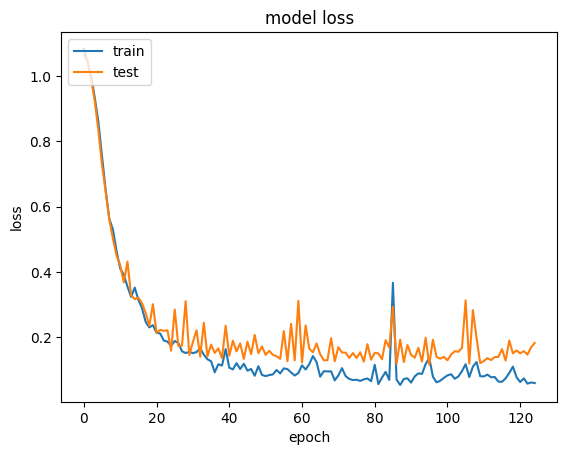

In [4]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

# create the model with a dropout layer
model = Sequential()
model.add(Dense(units=50, input_dim=4, activation='relu'))
model.add(Dense(units=100,  activation='relu'))
model.add(Dense(units=100,  activation='relu'))
# dropout layer to reduce the units by 0.5 in the layer before
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Add L1 regularizer


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                50        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 1s 26ms/step - loss: 1.4860 - accuracy: 0.3036 - val_loss: 1.4645 - val_accuracy: 0.4474
Epoch 2/125
12/12 [==============================] - 0s 5ms/step - loss: 1.4527 - accuracy: 0.4464 - val_loss: 1.4452 - val_accuracy: 0.42

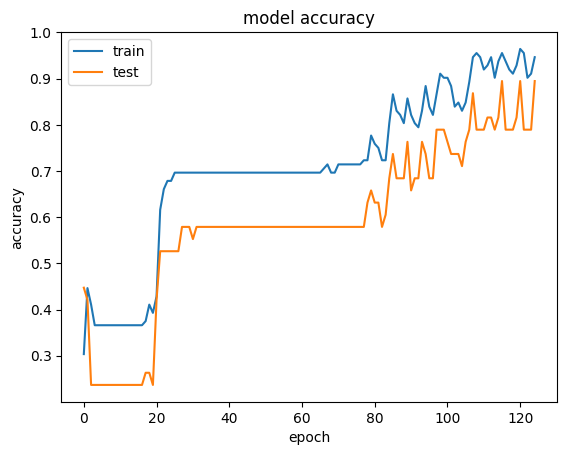

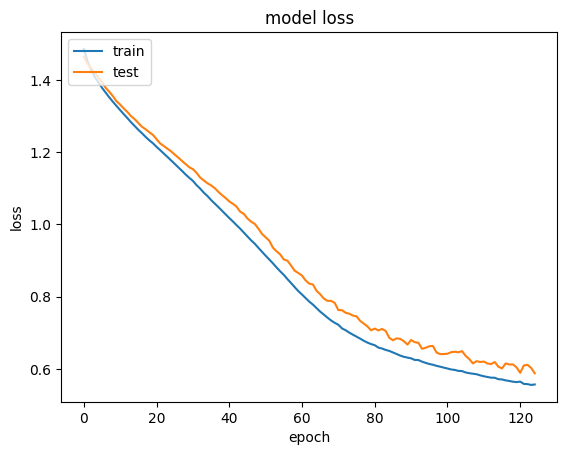

In [5]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

#create the model with the kernel_regularizer parameter set to l1 in each hidden layer
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=10,  activation='relu', kernel_regularizer='l1'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Add L2 Regularizer

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                50        
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 1s 35ms/step - loss: 1.3736 - accuracy: 0.3304 - val_loss: 1.4455 - val_accuracy: 0.3421
Epoch 2/125
12/12 [==============================] - 0s 16ms/step - loss: 1.3393 - accuracy: 0.3304 - val_loss: 1.3942 - val_accuracy: 0.3

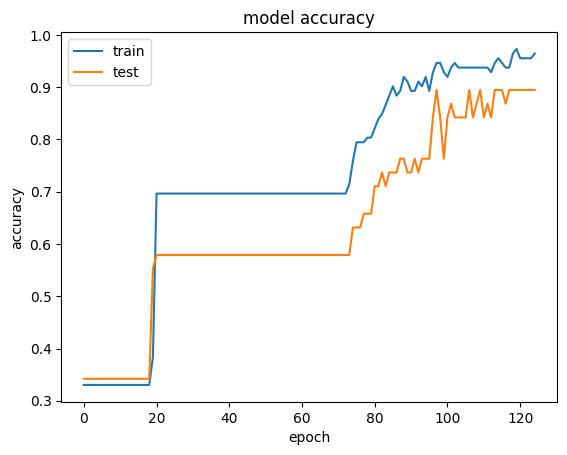

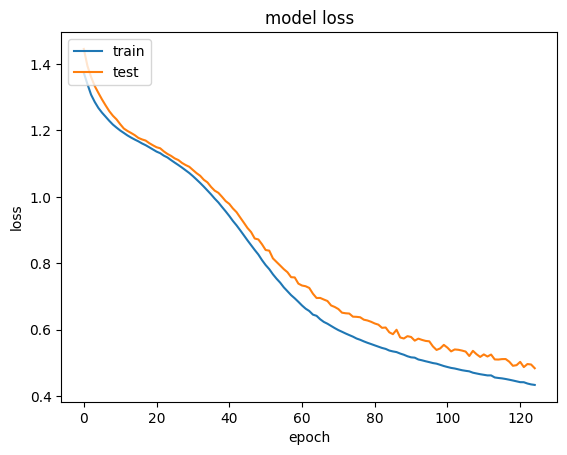

In [6]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

# create the model with the kernel_regularizer parameter set to l2 in each hidden layer
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu', kernel_regularizer='l2'))
model.add(Dense(units=10,  activation='relu', kernel_regularizer='l2'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Add L1 and L2 regularizers

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                50        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/125
12/12 [==============================] - 1s 26ms/step - loss: 1.6150 - accuracy: 0.3661 - val_loss: 1.6207 - val_accuracy: 0.2368
Epoch 2/125
12/12 [==============================] - 0s 6ms/step - loss: 1.5884 - accuracy: 0.3929 - val_loss: 1.5974 - val_accuracy: 0.34

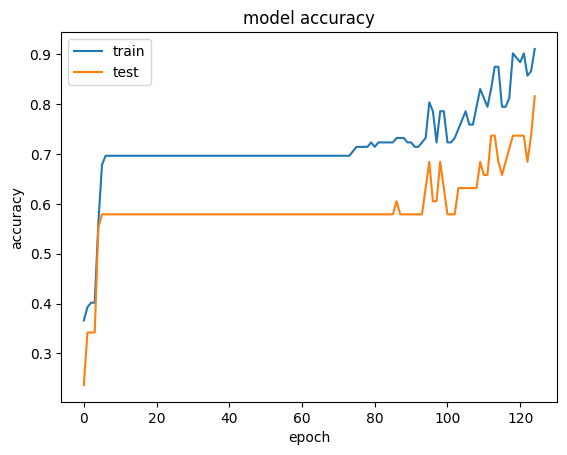

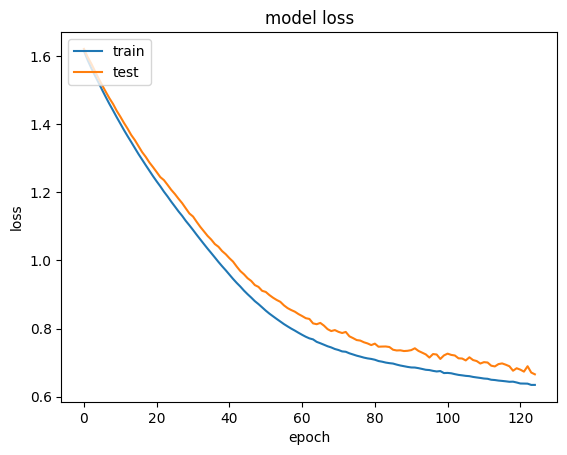

In [7]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

# create a regularizer object
from tensorflow.keras import regularizers # import the regularizers module
reg = regularizers.l1_l2(l1=0.01, l2=0.01)

# create the model with the regularizer object in each hidden layer
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu', kernel_regularizer=reg))
model.add(Dense(units=10,  activation='relu', kernel_regularizer=reg))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()